# Face Detection Challenge

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

add test change

In [3]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...
23700,99,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,45 108 120 156 206 197 140 180 191 199 204 207...


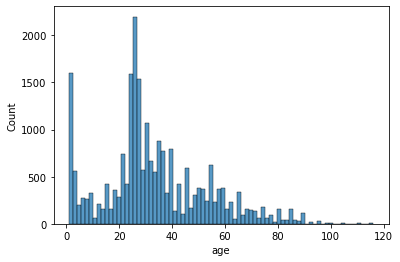

In [4]:
sns.histplot(data.age);

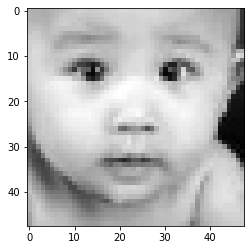

In [5]:
plt.imshow(np.array(data['pixels'][0].split(), dtype="int32").reshape(48,48), cmap="gray")

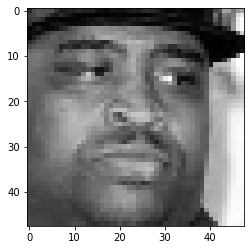

In [6]:
plt.imshow(np.array(data['pixels'][10000].split(), dtype="int32").reshape(48,48), cmap="gray")

## 2. Processing

In [7]:
X = data["pixels"].apply(lambda x: np.array(x.split(), dtype="int32"))
X = np.vstack(X.values)

X = X.reshape(-1, 48, 48, 1)

# Normalize data
X = X / 255

y = np.array(data['age'])

In [8]:
X.shape

(23705, 48, 48, 1)

In [15]:
pd.DataFrame(X[0,:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.505882,0.501961,0.501961,0.494118,0.498039,0.509804,0.521569,0.529412,0.545098,0.556863,...,0.505882,0.505882,0.494118,0.478431,0.474510,0.466667,0.462745,0.462745,0.388235,0.207843
1,0.509804,0.505882,0.501961,0.494118,0.498039,0.509804,0.529412,0.552941,0.560784,0.560784,...,0.509804,0.509804,0.501961,0.482353,0.486275,0.478431,0.470588,0.458824,0.384314,0.203922
2,0.513725,0.505882,0.509804,0.505882,0.505882,0.525490,0.541176,0.564706,0.568627,0.560784,...,0.525490,0.513725,0.501961,0.494118,0.494118,0.482353,0.478431,0.447059,0.380392,0.196078
3,0.529412,0.525490,0.521569,0.517647,0.513725,0.533333,0.556863,0.568627,0.576471,0.564706,...,0.537255,0.525490,0.517647,0.505882,0.509804,0.486275,0.486275,0.450980,0.372549,0.203922
4,0.541176,0.545098,0.545098,0.529412,0.525490,0.541176,0.549020,0.549020,0.549020,0.549020,...,0.549020,0.533333,0.517647,0.513725,0.517647,0.490196,0.490196,0.450980,0.356863,0.196078
5,0.552941,0.568627,0.564706,0.541176,0.529412,0.545098,0.545098,0.521569,0.498039,0.482353,...,0.552941,0.537255,0.529412,0.525490,0.521569,0.498039,0.490196,0.443137,0.321569,0.184314
6,0.576471,0.576471,0.568627,0.552941,0.541176,0.533333,0.517647,0.486275,0.458824,0.458824,...,0.541176,0.545098,0.541176,0.533333,0.529412,0.501961,0.486275,0.450980,0.282353,0.188235
7,0.580392,0.588235,0.584314,0.576471,0.552941,0.525490,0.490196,0.474510,0.478431,0.494118,...,0.509804,0.521569,0.541176,0.541176,0.541176,0.521569,0.486275,0.450980,0.227451,0.180392
8,0.580392,0.596078,0.596078,0.584314,0.560784,0.533333,0.486275,0.478431,0.501961,0.517647,...,0.470588,0.474510,0.517647,0.549020,0.556863,0.533333,0.505882,0.392157,0.247059,0.211765
9,0.580392,0.607843,0.600000,0.588235,0.572549,0.545098,0.529412,0.529412,0.545098,0.560784,...,0.517647,0.470588,0.505882,0.529412,0.545098,0.541176,0.525490,0.407843,0.490196,0.501961


## Neural Network for Age prediction

In [9]:
def init_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape = (48, 48, 1), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(units = 64, activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units = 10, activation = 'relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units = 1, activation = 'linear'))
    
    return model

model = init_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                589888    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [10]:
def compile_model(model):
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])
    return model

In [11]:
def fit_model(model, X, y):
    es = EarlyStopping(patience=2, verbose=1, restore_best_weights=True)

    history = model.fit(X, y, 
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=100, 
                    batch_size=64)
    return history

In [15]:
model = init_model()
model = compile_model(model)
history = fit_model(model, X, y)

Epoch 1/100
260/260 [==============================] - 25s 90ms/step - loss: 285.2037 - mae: 13.4493 - val_loss: 1479.4915 - val_mae: 34.9331
Epoch 2/100
260/260 [==============================] - 24s 94ms/step - loss: 147.7185 - mae: 9.4868 - val_loss: 966.3096 - val_mae: 28.0002
Epoch 3/100
260/260 [==============================] - 25s 98ms/step - loss: 138.9849 - mae: 9.0000 - val_loss: 1304.0613 - val_mae: 32.5439
Epoch 4/100
260/260 [==============================] - 24s 90ms/step - loss: 124.6641 - mae: 8.3542 - val_loss: 1087.2535 - val_mae: 29.6242
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


In [16]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['mae'], label='train mae'  + exp_name)
    ax2.plot(history.history['val_mae'], label='val mae'  + exp_name)
    ax2.set_title('mae')
    ax2.legend()
    return (ax1, ax2)

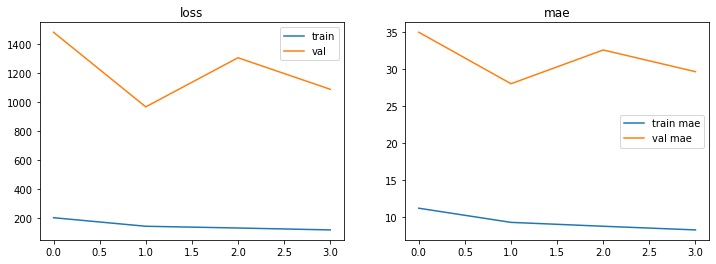

In [17]:
plot_history(history);

In [14]:
from sklearn.metrics import mean_absolute_error

# Baseline MAE predicting always mean age
mae_baseline = mean_absolute_error(y, np.ones(y.shape) * y.mean())

print(f'baseline MAE: {mae_baseline} years')

baseline MAE: 15.34814871735347 years
